In [ ]:
!wget -q https://raw.githubusercontent.com/DeNatur/RNNSpeechCommands/main/SequenceGenerator.py
!wget -q https://raw.githubusercontent.com/DeNatur/RNNSpeechCommands/main/audioUtils.py
!wget -q https://raw.githubusercontent.com/DeNatur/RNNSpeechCommands/main/requirements.txt
!pip install -r requirements.txt

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

from SequenceGenerator import SequenceGenerator
import audioUtils

In [2]:
classes = ['nine', 'yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
           'zero', 'one', 'two', 'three', 'four', 'five', 'six', 
           'seven',  'eight', 'backward', 'bed', 'bird', 'cat', 'dog',
           'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
           'visual', 'wow']

In [3]:
reload_sm_keras = tf.keras.models.load_model("attRNNModel/1/")
reload_sm_keras.summary()

D:\Anaconda\envs\rnn\lib\site-packages\tensorflow\python\keras\layers\core.py:1045: UserWarning: SpeechModels is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 1, None)      0           input[0][0]                      
__________________________________________________________________________________________________
mel_stft (Melspectrogram)       (None, 80, None, 1)  1091664     reshape[0][0]                    
__________________________________________________________________________________________________
mel_stft_norm (Normalization2D) (None, 80, None, 1)  0           mel_stft[0][0]                   
_______________________________________________________________________________________

In [4]:
audioUtils.WAV2Numpy("sampleData")

0it [00:00, ?it/s]


{'sampledata/forward_dlugie.wav.npy': 13}


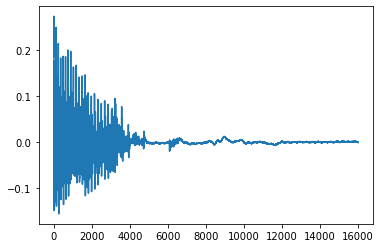

In [16]:
path = "sampledata/forward_1s.wav.npy"

idArray = [path]
labels = {path: 13}

testGen = SequenceGenerator(idArray, labels, shuffle=False, batch_size=len(idArray))
x_test, y_test = testGen.__getitem__(0)
plt.plot(x_test[0])

pred = reload_sm_keras.predict(x_test)

In [17]:
x_tab = {}
for id, x in enumerate(pred[0]):
    x_tab[id]=  x * 100

for x in sorted(x_tab.items(), key=lambda item: item[1], reverse=True):
    a, b = x
    print("{:<10} {:.2f}%".format(classes[a - 1], b))

forward    94.11%
four       5.22%
three      0.22%
backward   0.12%
five       0.07%
marvin     0.07%
follow     0.04%
bird       0.03%
tree       0.03%
nine       0.02%
visual     0.02%
dog        0.01%
right      0.01%
house      0.01%
yes        0.00%
cat        0.00%
two        0.00%
one        0.00%
down       0.00%
zero       0.00%
on         0.00%
happy      0.00%
off        0.00%
six        0.00%
go         0.00%
sheila     0.00%
seven      0.00%
wow        0.00%
learn      0.00%
left       0.00%
no         0.00%
eight      0.00%
stop       0.00%
bed        0.00%
wow        0.00%
up         0.00%
